In [1]:
## Change these parameters for each run
species="S. enterica"
hist_color='blue'

In [2]:
# Load file with ANI data between representatives
ANI_pairs_file = 'ANI-between-reps.tsv'

# Read file line by line and store ANI value
ANI_values_list = []
with open (ANI_pairs_file, 'r') as fh:
    for line in fh:
        ANI_value = line.split('\t')[2]
        ANI_values_list.append( float(ANI_value) )

In [3]:
# Check that number of values in list is correct
# Should be same as the numer of lines of ANI-between-reps.tsv
len(ANI_values_list)

369617

In [4]:
# Minimum and maximum values in list
print(f'min = {min(ANI_values_list)}')
print(f'max = {max(ANI_values_list)}')

min = 89.1092
max = 98.9999


In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.rcParams.update({'font.size': 14})

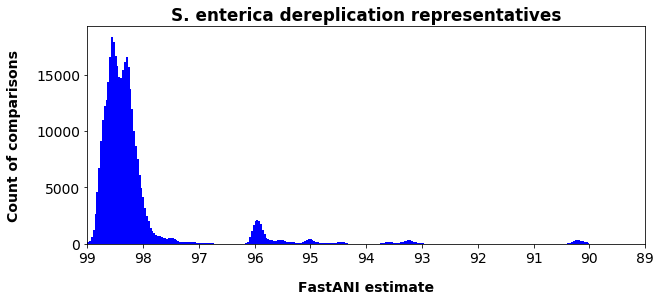

In [7]:
plt.figure(figsize=(10,4))
_ = plt.hist(ANI_values_list, 300, color=hist_color)

## Get the current axes to be able to modify them
ax = plt.gca()

## Flip x axis
ax.set_xlim(ax.get_xlim()[::-1])
## Set x-axis left value as 99
# ax.set_xlim(99,min(ax.get_xlim()))

## Force x-axis ticks to decrease by 1 each
# Truncate minimal x-value based on ANI list
min_x = int(str(min(ANI_values_list)).split('.')[0])
# Get a range of x-ticks from max to min decreasing by 1
x_ticks = np.arange(99, min_x-1, -1)
# Plot the new ticks
_ = plt.xticks(x_ticks)

## Scale y-axis to scientific notation
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
## Make y-axis log scale
# plt.yscale('log')

## Add title and axes
_ = plt.xlabel('FastANI estimate', labelpad=15, fontweight='bold')
_ = plt.ylabel('Count of comparisons', labelpad=15, fontweight='bold')
title=species+' dereplication representatives'
_ = plt.title(title, fontweight='bold')

## Save figure as a png
file_name = 'plots/' + re.sub('. ','-',species) + '-reps-ANI-hist.png'
plt.savefig(file_name, bbox_inches='tight', dpi=100)

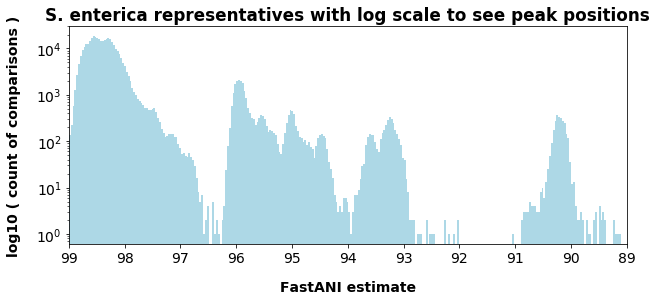

In [8]:
plt.figure(figsize=(10,4))
_ = plt.hist(ANI_values_list, 300, color='light'+hist_color)

## Get the current axes to be able to modify them
ax = plt.gca()

## Flip x axis
ax.set_xlim(ax.get_xlim()[::-1])
## Set x-axis left value as 99
# ax.set_xlim(99,min(ax.get_xlim()))

## Force x-axis ticks to decrease by 1 each
# Truncate minimal x-value based on ANI list
min_x = int(str(min(ANI_values_list)).split('.')[0])
# Get a range of x-ticks from max to min decreasing by 1
x_ticks = np.arange(99, min_x-1, -1)
# Plot the new ticks
_ = plt.xticks(x_ticks)

## Scale y-axis to scientific notation
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
## Make y-axis log scale
plt.yscale('log')

## Add title and axes
_ = plt.xlabel('FastANI estimate', labelpad=15, fontweight='bold')
_ = plt.ylabel('log10 ( count of comparisons )', labelpad=15, fontweight='bold')
title=species+' representatives with log scale to see peak positions'
_ = plt.title(title, fontweight='bold')

## Save figure as a png
file_name = 'plots/' + re.sub('. ','-',species) + '-reps-ANI-hist-logy.png'
plt.savefig(file_name, bbox_inches='tight', dpi=100)